# 0.Name & Z-ID (5 pts)
Mounika Thudi \
Z1948596 \
Assignment 8

# 1. Unemployment Rates (25 pts)

# a. Highest Unemployment Rate (2000+) (10 pts)

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
employement_dataset = pd.read_csv("http://faculty.cs.niu.edu/~dakoop/cs503-2022sp/a8/illinois-employment.csv.gz")
df = pd.DataFrame(employement_dataset)

df_unemp = df[(df.YEAR >= 2000)]

df_unemp.sort_values(["RATE"]).tail(1)[["COUNTY", "YEAR"]]

,COUNTY,YEAR
1227,BOONE COUNTY,2009


In [3]:
# to get the county and year with max unemployment rate in another way 
df_modified=df[df.YEAR>=2000]
max_unemployment= df_modified[df_modified.RATE == df_modified.RATE.max()]
print("County with max unemployment rate is",max_unemployment.COUNTY.to_string(index=False),"and the year is",max_unemployment.YEAR.to_string(index=False))

County with max unemployment rate is BOONE COUNTY and the year is 2009


# b. Lowest Average Unemployment Rate in the 1990s (15 pts)

In [4]:
df_avg_unemp = df[(df['YEAR']>=1990) & (df['YEAR'] <= 1999)]
df_avg_unemp=df_avg_unemp.groupby('COUNTY').mean().reset_index()
df_avg_unemp.sort_values(["RATE"]).head(1)[["COUNTY", "YEAR"]]

,COUNTY,YEAR
61,MCDONOUGH COUNTY,1994.5


In [5]:
#another way to get lowest average unemployement rate
df2=df_avg_unemp.groupby('COUNTY').mean().reset_index()
min_unemployment= df2[df2.RATE == df2.RATE.min()]
print("County with lowest average unemployment rate in 1900's is",min_unemployment.COUNTY.to_string(index=False))

County with lowest average unemployment rate in 1900's is MCDONOUGH COUNTY


# 2. Employment Status over Time

# a. Line Chart (10 pts)

In [6]:
df_year=df.groupby('YEAR').sum().reset_index()

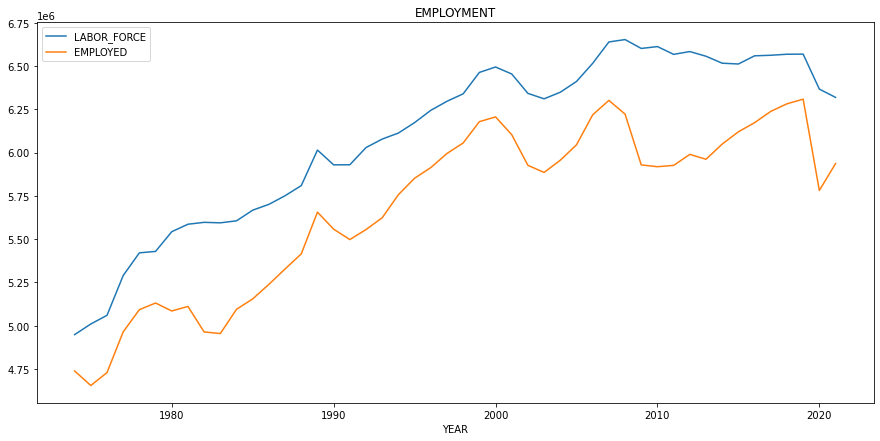

In [7]:
plt.figure(figsize=(15,7)) 
plt.plot(df_year.YEAR.to_list(),df_year.LABOR_FORCE.to_list(),label='LABOR_FORCE')
plt.plot(df_year.YEAR.to_list(),df_year.EMPLOYED.to_list(),label='EMPLOYED')
plt.xlabel('YEAR')
plt.title("EMPLOYMENT")
plt.legend()
plt.show()

# b. Grouped Bar Chart (20 pts)

In [8]:
df['COUNTY'] = df['COUNTY'].str.upper()
df['COUNTY'] = df['COUNTY'].str.removesuffix(" COUNTY")
df_county=df[df.COUNTY.isin(['DEKALB', 'KANE', 'BOONE', 'MCHENRY', 'WINNEBAGO', 'OGLE', 'LEE','KENDALL'])]

In [9]:
df_county["DECADE"]=df["YEAR"]//10
df_county["DECADE"]=10*df_county["DECADE"]

/tmp/ipykernel_13128/392679217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county["DECADE"]=df["YEAR"]//10
/tmp/ipykernel_13128/392679217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county["DECADE"]=10*df_county["DECADE"]


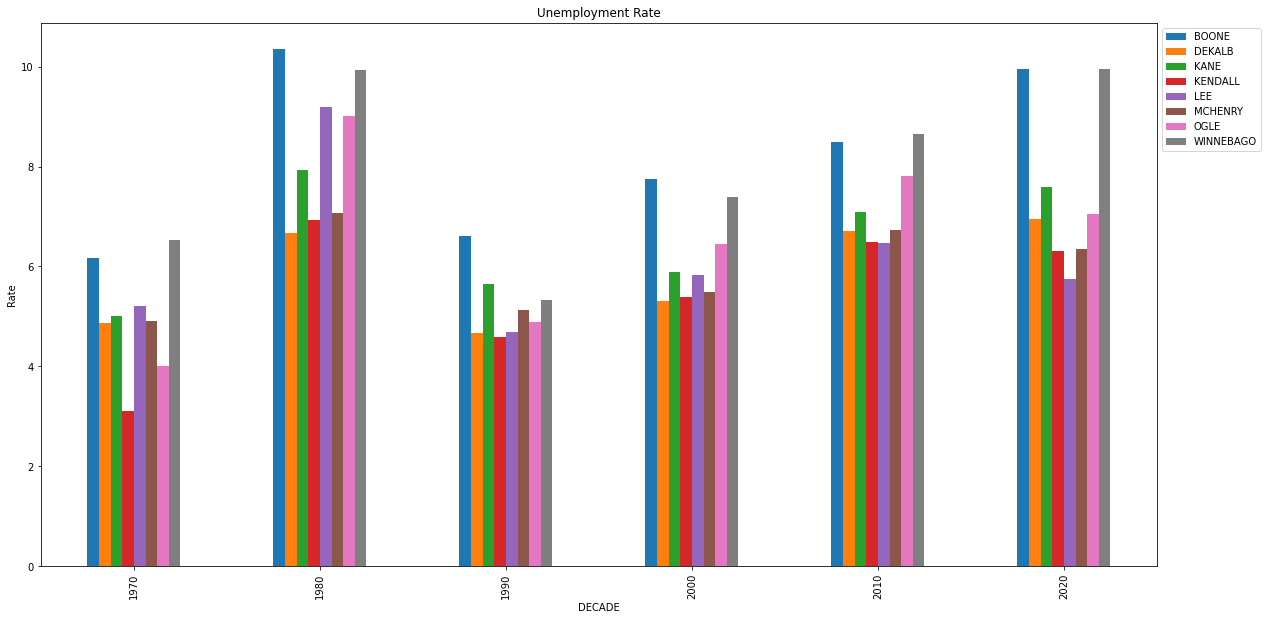

In [10]:
df_try=df_county.groupby(['COUNTY','DECADE']).mean()
df_unstacked=df_try.unstack('COUNTY')
df_unstacked["RATE"].plot.bar(figsize=(20, 10),ylabel="Rate",title="Unemployment Rate")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Extra credit Sort the bars in Part 2b(10pts).

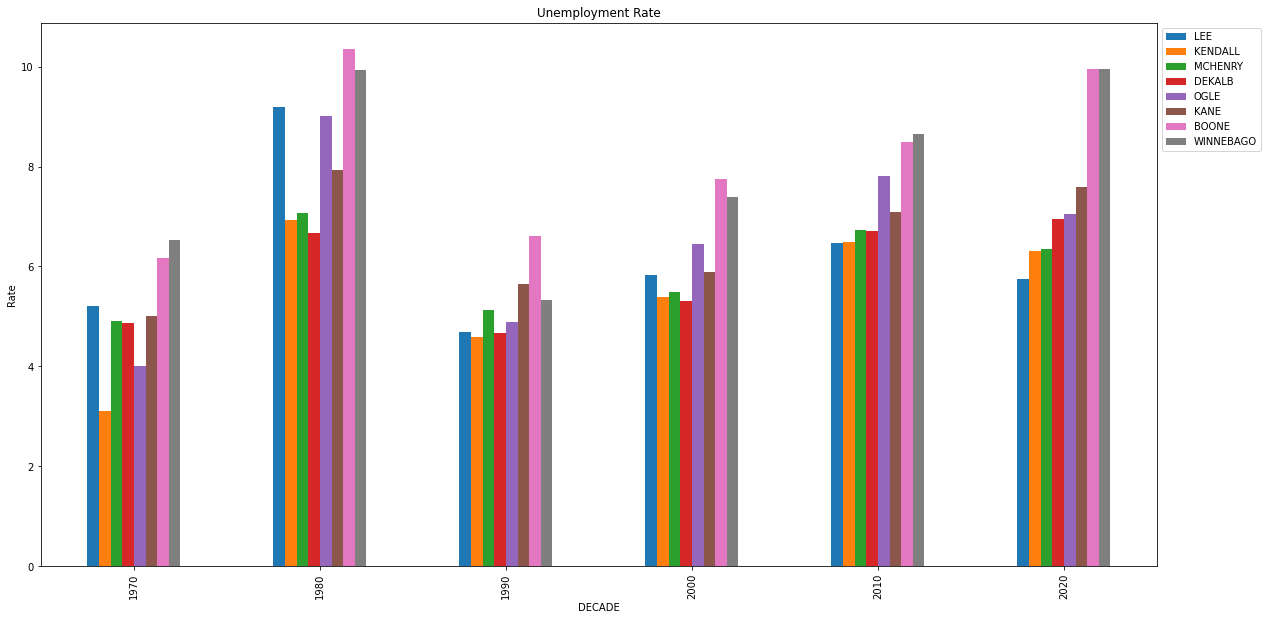

In [11]:
sorted_df = df_unstacked["RATE"].sort_values(by = 2020, axis = 1)
sorted_df.plot.bar(figsize=(20, 10),ylabel="Rate",title="Unemployment Rate")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 3. Maps

In [12]:
# transforming a type of column from year 2016 to 2021, inclusive
df['modified_FIPS'] = df['FIPS'].astype(str).str.rjust(3,'0')
df_modify= (df['YEAR']>=2016) & (df['YEAR'] <= 2021)
unemployement_dataset = df.loc[df_modify]

# a. County Locations (20 pts)

In [13]:
url_topojson = 'https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/IL-17-illinois-counties.json'
data_topojson_remote = alt.topo_feature(url_topojson, 'cb_2015_illinois_county_20m')


alt.Chart(unemployement_dataset).mark_geoshape().encode(
    stroke = alt.value('grey'),
    strokeWidth = alt.value(1.5),
    shape='geo:G',
    color='RATE:Q',
    facet=alt.Facet('YEAR:N', columns=3),
).transform_lookup(
    lookup='modified_FIPS',
    from_=alt.LookupData(data_topojson_remote, 'properties.COUNTYFP'),
    as_='geo'
).properties(
    width=240,
    height=360,
).project(
    type='mercator'
)

alt.Chart(...)

# b. [CSCI 503 Only] Brushing (15 pts)

In [14]:
high_light = alt.selection_single(on='mouseover', fields=['modified_FIPS'],empty='none')

alt.Chart(unemployement_dataset).mark_geoshape().encode(
    color='RATE:Q',
    stroke =alt.condition(high_light, alt.value('red'), alt.value('grey')),
    strokeWidth = alt.condition(high_light,alt.value(3.5),alt.value(1)),
    shape='geo:G',
    facet=alt.Facet('YEAR:N', columns=3),
).transform_lookup(
    lookup='modified_FIPS',
    from_=alt.LookupData(data_topojson_remote, 'properties.COUNTYFP'),
    as_='geo'
).properties(
    width=240,
    height=360,
).project(
    type='mercator'
).add_selection(high_light)

alt.Chart(...)

# Extra Credit Use altair to draw the plots in Part 2 (10pts)

In [15]:
alt.layer(
    alt.Chart(df_year).mark_line().encode(
    x=alt.X('YEAR', axis=alt.Axis(grid=False)),
    y=alt.Y('LABOR_FORCE', axis=alt.Axis(grid=False)),
  ).properties(
      width=550, height=250
  ),
  alt.Chart(df_year).mark_line().encode(
      x=alt.X('YEAR', axis=alt.Axis(grid=False)),
      y=alt.Y('EMPLOYED', axis=alt.Axis(grid=False)),
      color=alt.value('orange')
  ).properties(
      width=500, height=300
  ).properties(
    title='EMPLOYMENT'),
)


alt.LayerChart(...)

In [16]:
chart=alt.Chart(df_county).mark_bar().encode(
    column='DECADE',
    x=alt.X('COUNTY', axis=alt.Axis(grid=False)),
    y=alt.Y('RATE', axis=alt.Axis(grid=False)),
    color='COUNTY'
).properties(
    width=250, height=280
).properties(
    title='Unemployment Rate'
)

chart = chart.configure_title(fontSize=15, offset=10, orient='top', anchor='middle')
chart

alt.Chart(...)

In [17]:
#Grouped bar chart in other way
chart = alt.Chart(df_county).mark_bar().encode(
   x=alt.X('DECADE', axis=alt.Axis(labelAngle=0,grid=False)),
   y=alt.Y('RATE', axis=alt.Axis(grid=False)),
   color='COUNTY'
).configure_view(
    stroke=None,
)

chart

alt.Chart(...)

###### 